In [6]:
import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

In [25]:
# Draw a diagonal red line with thickness of 5 px
cv.line(img, (0, 0), (250, 511), (0, 255, 0), 5)
pass

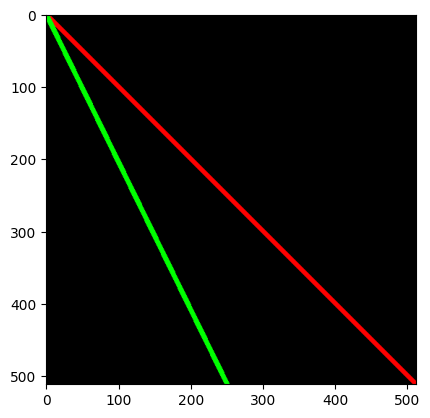

In [20]:
plt.imshow(img)

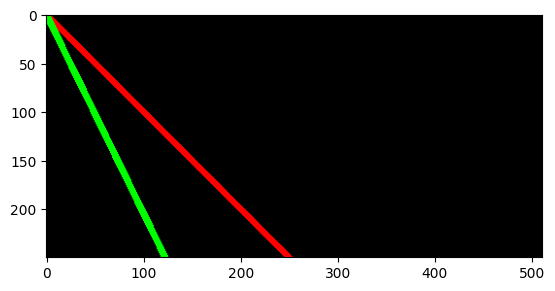

In [21]:
img_crop = img[:250, :511, :]
plt.imshow(img_crop)

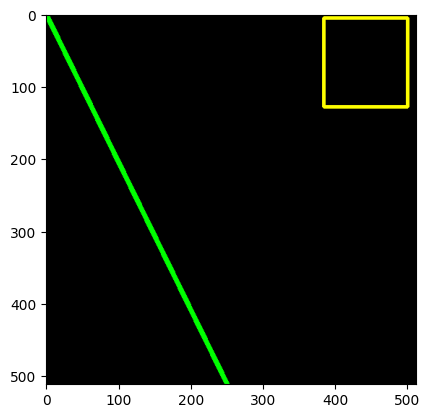

In [26]:
# To draw a rectangle, you need top-left corner and bottom-right corner of rectangle.
# This time we will draw a green rectangle at the top-right corner of image.
cv.rectangle(img, (384, 5), (500, 128), (255, 255, 0), 3)
plt.imshow(img)

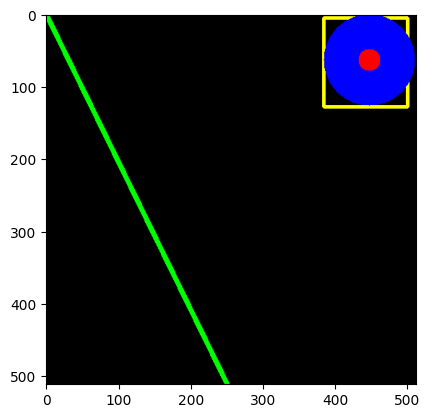

In [29]:
# To draw a circle, you need its center coordinates and radius.
# We will draw a circle inside the rectangle drawn above.
cv.circle(img, (447, 63), 15, (255, 0, 0), -1)
plt.imshow(img)

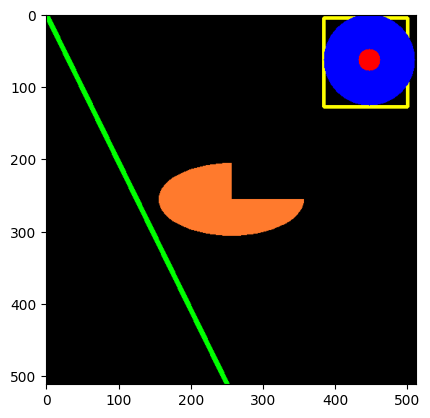

In [30]:
cv.ellipse(
    img,
    # center
    (256, 256),
    # axes
    (100, 50),
    # angle
    0,
    # startAngle
    0,
    # endAngle
    270,
    # color
    (255, 122, 45),
    # thickness (filled if negative)
    -1)
plt.imshow(img)

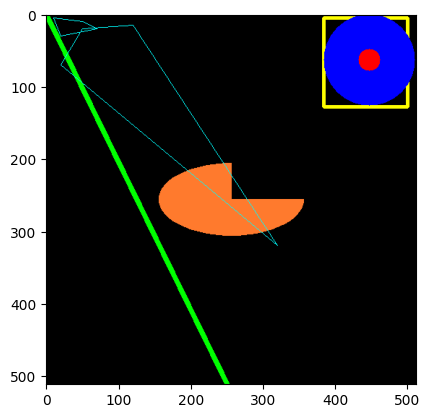

In [31]:
pts1 = np.array([
    [10, 5], [20, 30], [70, 20], [50, 10]
], np.int32)
pts1 = pts1.reshape((-1, 1, 2))

pts2 = np.array([
    [120, 15], [320, 320], [20, 70], [50, 20]
], np.int32)
pts2 = pts2.reshape((-1, 1, 2))

cv.polylines(img, [pts1, pts2], True, (0, 255, 255))
plt.imshow(img)

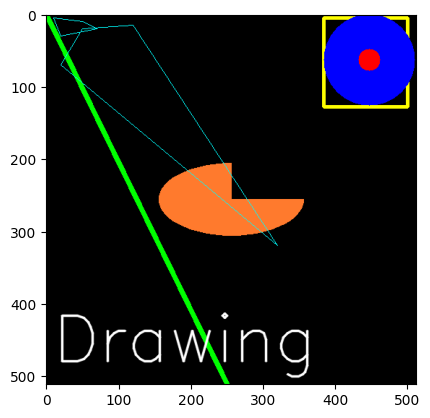

In [32]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'Drawing', (10, 480), font, 3, (255, 255, 255), 2, cv.LINE_AA)
plt.imshow(img)

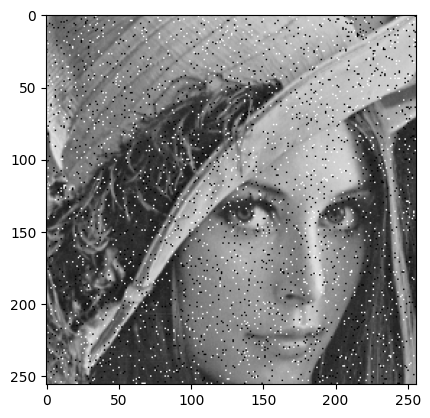

In [64]:
img = cv.imread("assets/noisy_image.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [40]:
kernel = np.ones((20, 20), np.float32) * 1/400
img_res = cv.filter2D(img, -1, kernel)

In [48]:
img.shape

(1258, 940, 3)

In [44]:
img_res = cv.blur(img, (5, 5))

In [53]:
img_res = cv.GaussianBlur(img, (21, 21), 0)

In [59]:
img_res = cv.bilateralFilter(img, 9, 75, 75)

In [65]:
img_res = cv.medianBlur(img, 3)

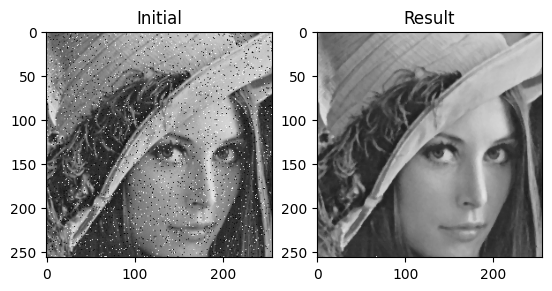

In [66]:
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Initial')
plt.subplot(122), plt.imshow(img_res, cmap="gray"), plt.title('Result')
plt.show()